## Análisis de datos del Brexit de UK
Para analizar datos necesitamos datos, muchos datos… y que mejor que los datos de un gobierno ya que son fiables y normalmente siempre están muy bien organizados, así que vamos a analizar los **datos de Brexit de UK** ocurridos el día 23 de junio de 2016, ¡empezamos!

### Recordatorio… ¿Que es Pandas?
**Pandas es una biblioteca de software escrita en Python para la manipulación y análisis de datos.** En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. Pandas es un software libre. El nombre se deriva del término “datos de panel” (término de econometría que designa datos que combinan una dimensión temporal con otra dimensión transversal), de ahí Pandas.

### Análisis
* Calculamos quien esta a favor de la UE y quien no.
* Calculamos los porcentajes
* Calculamos el censo, porcentaje de votantes y rechazados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("EU-referendum-result-data.csv")

#Sumamos quien esta a favor de la UE y quien no
no_ue = df["Leave"].sum()
si_ue = df["Remain"].sum()

#Calculamos los porcentajes
porc_no_ue = no_ue/(si_ue+no_ue)*100
porc_si_ue = si_ue/(si_ue+no_ue)*100

print("El porcentaje de NO UE es:", round(porc_no_ue,2))
print("El porcentaje de SI UE es:", round(porc_si_ue,2))

#Calculamos el censo, porcentage de votantes y rechazados...







El porcentaje de NO UE es: 51.89
El porcentaje de SI UE es: 48.11


### ¿Cual serán los condados mas a favor la UE y cuales serán lo menos?

Vamos a graficar estos resultados:

<ipython-input-5-5582a8934420>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfa = df.groupby("Area").sum()


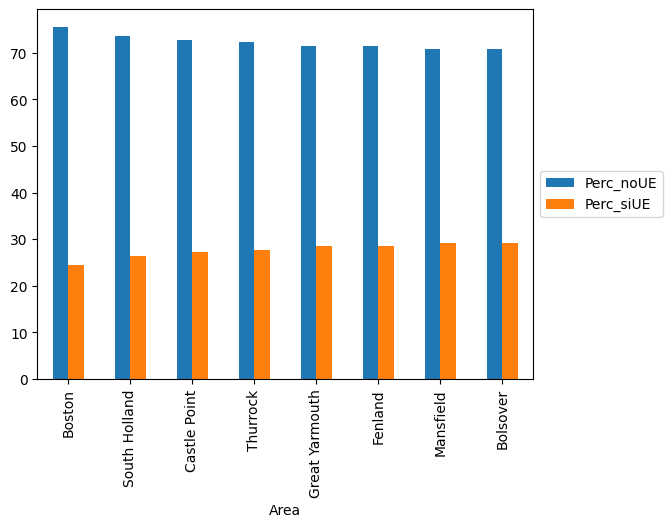

In [ ]:
#Con matplotlib vamos a hacer 3 graficas
# La primera son las 8 Áreas al no UE
dfa = df.groupby("Area").sum()
dfa["Perc_noUE"] = dfa["Leave"] / (dfa["Remain"] + dfa["Leave"]) * 100
dfa["Perc_siUE"] = dfa["Remain"] / (dfa["Remain"] + dfa["Leave"]) * 100
top5_noUE = dfa[["Perc_noUE", "Perc_siUE"]].sort_values(by="Perc_noUE", ascending=False)[0:8]
top5_noUE.plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# La segunda son las 8 Areas al si UE




# La tercera son las 8 Regiones al si UE y las 8 Regiones al no UE (agrupador por Región)






En este primer análisis hemos podido analizar por áreas y regiones mas a favor de la UE y los menos. 

Ahora vamos a dar un paso más y vamos a ver otras variables que también han influido en ese voto como puede ser:

* **Edad**
* **Nivel de educación**
* **Gente de UK que no vive en UK**
* **Ingresos salariales**
* **Gente sin trabajo**

Con estas variables el análisis se vuelve mas interesante porque podemos saber:
* Si los jóvenes o mayores quieren quedarse o salir de la UE.
* Si el nivel de educación es importante la hora de si UE o no UE.
* que piensa la población acerca del Brexit si tienes un salario alto o en cambio no tienes empleo.

La mayoría de estos factores son determinantes para conocer a la población y pensar un poco mas allá del resultado final.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

census_data = {
"age" : "r21ewrttableks102ewladv1_tcm77-290566.xls",
"unemployment" : "r21ewrttableks601ewladv1_tcm77-290745.xls",
"education" : "r21ewrttableks501ewladv1_tcm77-290734.xls",
"outside_uk" : "r21ewrttableqs203ewladv1_tcm77-290919.xls",
}

#Cargamos los datos de cada Excel para poder mostrar las gráficas según cada elemento
edad = pd.read_excel(io=census_data["age"], sheet_name="KS102EW_Numbers", header=10, usecols=("A:W"), skiprows=[11,12,13])
edad.dropna(how='all', inplace=True)
edad.rename(index=str, inplace=True, columns={"Median age": "median_age", })
edad = edad[["Area code", "median_age"]]
edad.dropna(how='all', inplace=True)

educacion = pd.read_excel(io=census_data["education"], sheet_name="KS501EW_Numbers", header=10, usecols=("A,E,J,K"), skiprows=[11,12,13])
educacion.dropna(how='all', inplace=True)
educacion["perc_high_education"] = (educacion[educacion.columns[2]] + educacion[educacion.columns[3]]) / educacion[educacion.columns[1]]
educacion = educacion[["Area code", "perc_high_education"]]






#Hacemos una funcion para plotear
data = votes.merge(edad, on='Area code').merge(desempleo, on='Area code').merge(educacion, on='Area code').merge(fuera_uk, on='Area code')

def showplot(data, factor,factor2):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(1,1,1)
  ax.scatter(data["votes"], data[factor], s=20, c='r', marker="o", label=factor2)
  plt.legend(loc='upper left');
  plt.xlabel("votos (< 0 = noUE / > 0 = siUE)")
  plt.ylabel(factor2)
  plt.axvline(x=0)
  plt.axhline(y=data[factor].mean())# linea horizontal en la media de los datos
  plt.show()
  fig.savefig(factor+".png")
    

showplot(data, "median_age", "media_edad")
showplot(data, "perc_high_education", "%_alta_educacion")

NameError: ignored

In [ ]:
def showplot(data, factor,factor2):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(1,1,1)
  ax.scatter(data["Valid_Votes"], data[factor], s=20, c='r', marker="o", label=factor2)
  plt.legend(loc='upper left');
  plt.xlabel("votos (< 0 = noUE / > 0 = siUE)")
  plt.ylabel(factor2)
  plt.axvline(x=0)
  plt.axhline(y=data[factor].mean())# linea horizontal en la media de los datos
  plt.show()

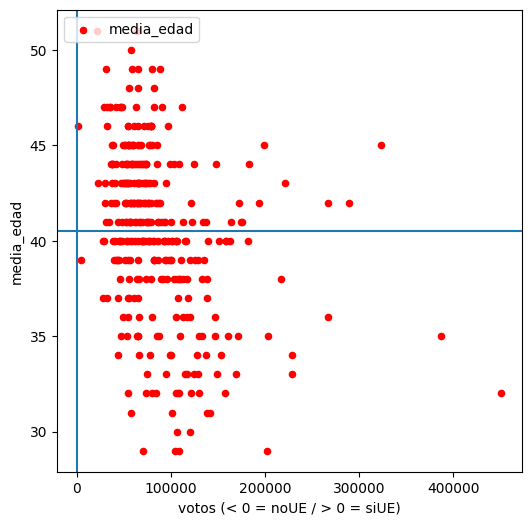

In [ ]:
showplot(df_referendum, "Median_Age", "media_edad")

In [ ]:
# Function to plot a combined chart for a variable vs voters (leave and remain)

def chart_voters(data, column, title, label, colors):
  fig = plt.figure(figsize=(10,6))
  ax = data.plot(kind='bar', grid=True, color=colors)
  ax.set_title(title)
  ax2 = ax.twinx()
  ax2.plot(data[column].values, linestyle='-', linewidth=2.0, label=label, color=colors[1])
  ax2.legend(loc='upper center')
  plt.show()


## Resultados


Explicación resultados: